<h1 align=center>TP : Etude de l'effet du bagging sur un jeu de données factice</h1>

<h2 align=center>CentraleSupélec-OpenClassrooms Certifiyng Training</h2>

<h3 align=center>Jean Martial Tagro </h3>

Nous allons observer l'effet des méthodes ensemblistes sur un petit jeu de données factice, afin de nous rendre compte de l'effet du bagging.

### 1. Creation de jeu de données d'exemple

In [5]:
%pylab inline

from sklearn.datasets import make_moons # pour faire des sortes de demi-lunes..

Populating the interactive namespace from numpy and matplotlib


In [6]:
# cree le dataset avec 100 echantillons et un peu de bruit pour le rendre factice
X, y = make_moons(n_samples=100, noise=0.25)

In [16]:
from sklearn.model_selection import train_test_split

# stratify pour conserver les mêmes proportions de y -- la stratification est automatique non ?
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [36]:
# Bagging
from sklearn.ensemble import BaggingClassifier

# avec 5 apprenants faibles. Par défaut, le classifieur de base utilisé par Scikit learn est un arbre de décision 
#donc inutile de le préciser
bagging = BaggingClassifier(n_estimators=5)
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=5,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

On va maintenant afficher les différentes zones de classifications des arbres ainsi que du bagging de ces arbres. Pour cela j'ai utilisé deux fonctions d'affichage : <strong> plot_tree_partition  et  plot_2d_separator  </strong>  <a href=https://github.com/amueller/mglearn/tree/master/mglearn>disponibles ici</a>. Le plus simple est d'installer le packagemglearnavec la commande <strong> !pip install mglearn </strong>

In [32]:
# installation du package mglearn
!pip install mglearn

     |████████████████████████████████| 540 kB 3.6 MB/s eta 0:00:01
  Created wheel for mglearn: filename=mglearn-0.1.8-py2.py3-none-any.whl size=582647 sha256=5f08c7b546dbaf2ca1326d77cfc53df260027ac3bd033ba056ef58e8a679cd60
  Stored in directory: /Users/jean-martial/Library/Caches/pip/wheels/99/14/ee/f816f6a07c583a6c1bf47ff2da83039f9cc4b0d32452b6dfca
Successfully built mglearn


In [34]:
from mglearn.plot_interactive_tree import plot_tree_partition
from mglearn.plot_2d_separator import plot_2d_separator
from mglearn.tools import discrete_scatter

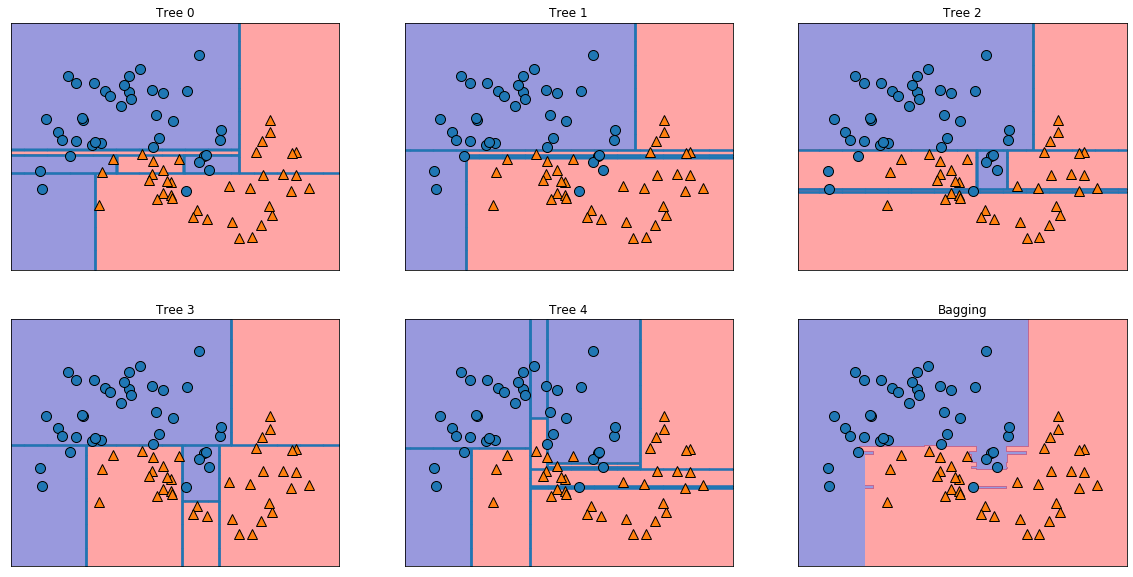

In [38]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
    ax.set_title("Tree {}".format(i))
    plot_tree_partition(X_train, y_train, tree, ax=ax)
plot_2d_separator(bagging, X_train, fill=True, ax=axes[-1, -1],
                                    alpha=.4)
axes[-1, -1].set_title("Bagging")
discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.show()

On peut voir  que les arbres effectuent des erreurs (overfitting) relativement différentes, qui une fois combinés par le bagging sont lissées et donnent une bien meilleure performance. Et encore, n'on a utilisé que 5 arbres à des fins de démonstration, mais en réalité on va en utiliser bien plus en pratique (des centaines voir des milliers).

---